In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_json('./data/train.json')

In [3]:
train.shape

(49352, 15)

In [4]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [6]:
train.bathrooms.describe()

count    49352.00000
mean         1.21218
std          0.50142
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         10.00000
Name: bathrooms, dtype: float64

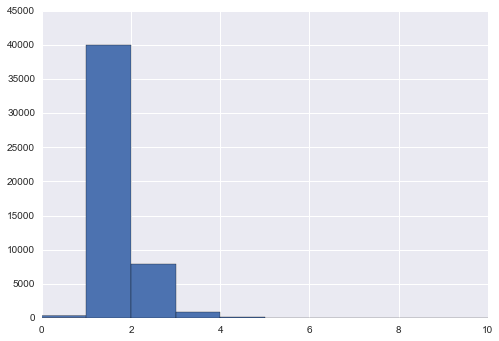

In [7]:
train.bathrooms.hist()

In [8]:
train.bedrooms.value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

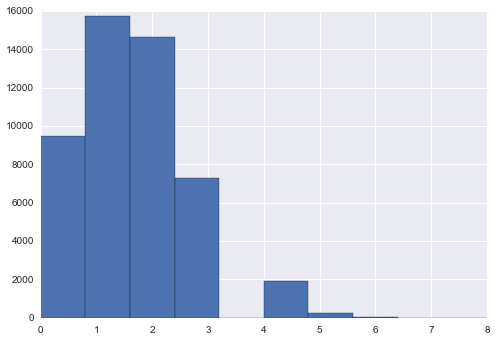

In [9]:
train.bedrooms.hist()

In [10]:
train.bedrooms.value_counts().to_dict()

{0: 9475, 1: 15752, 2: 14623, 3: 7276, 4: 1929, 5: 247, 6: 46, 7: 2, 8: 2}

In [11]:
train.shape

(49352, 15)

In [12]:
len(train.building_id.unique())

7585

In [13]:
train.created.describe()

count                   49352
unique                  48675
top       2016-04-15 02:24:25
freq                        3
Name: created, dtype: object

In [14]:
train.created.max(), train.created.min()

(u'2016-06-29 21:41:47', u'2016-04-01 22:12:41')

In [15]:
train.description[:10]

10        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
10000                                                      
100004    Top Top West Village location, beautiful Pre-w...
100007    Building Amenities - Garage - Garden - fitness...
100013    Beautifully renovated 3 bedroom flex 4 bedroom...
100014                                                     
100016    Stunning unit with a great location and lots o...
100020    This huge sunny ,plenty of lights 1 bed/2 bath...
100026                             <p><a  website_redacted 
100027    This is a spacious four bedroom with every bed...
Name: description, dtype: object

In [16]:
train.features[:2].values

array([[],
       [u'Doorman', u'Elevator', u'Fitness Center', u'Cats Allowed', u'Dogs Allowed']], dtype=object)

In [17]:
len(train.listing_id.unique())

49352

In [18]:
len(train.manager_id.unique())

3481

In [19]:
train.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [20]:
train.price.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

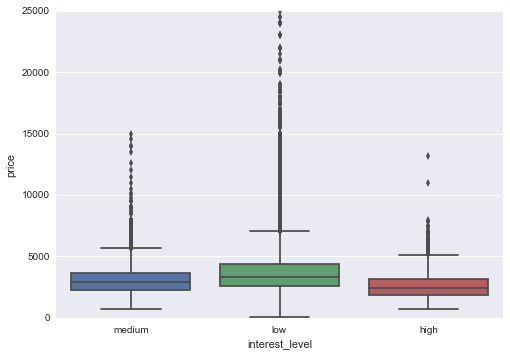

In [21]:
ax = sns.boxplot(x="interest_level", y="price", data=train[train.price < 25000])

In [22]:
len(train[train.price >= 25000])

81

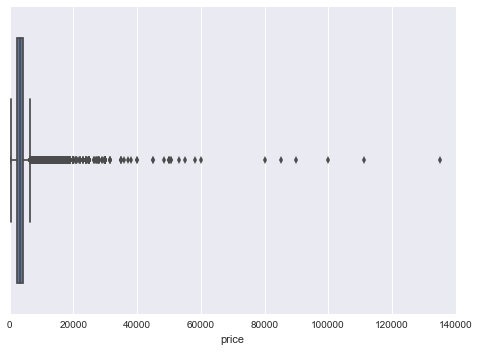

In [23]:
ax = sns.boxplot(x="price", data=train[train.price < 1000000])

In [24]:
train.price.median(), train.price.mean()

(3150.0, 3830.1740355000811)

In [25]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

### Feature Extraction

1. Breakdown feature field -> Bag of words and TF-IDF
2. Created -> datetime feature
3. latitude+longtitude, street_address, display_address -> neighborhood

In [26]:
train['feature_list'] = train['features'].map(lambda x: '|'.join(x))

In [40]:
# Find unique feature word list
feature_list = train['features'].sum()

TypeError: unhashable type: 'list'

In [41]:
len(feature_list)

267906

In [42]:
unique_feature_list = list(set(feature_list))

In [43]:
len(unique_feature_list)

1556

In [44]:
unique_feature_list[:10]

[u'Updated Kitchen and Bathroom',
 u'Gym Fitness Lounge Swimming Pool Sun Decks Exercise Studios Indoor Half-Basketball Court',
 u'Gas&Electric included',
 u'private-outdoor-space',
 u'Great Natural Light',
 u'Super On Site',
 u'Vaulted Ceilings',
 u'custom lighting',
 u'Diswasher',
 u'Brand Newm Outdoor Deck']

In [33]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,feature_list
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,Doorman|Elevator|Fitness Center|Cats Allowed|D...
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,Laundry In Building|Dishwasher|Hardwood Floors...
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,Hardwood Floors|No Fee
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,Pre-War


In [35]:
train.iloc[1,:]

bathrooms                                                          1
bedrooms                                                           2
building_id                         c5c8a357cba207596b04d1afd1e4f130
created                                          2016-06-12 12:19:27
description                                                         
display_address                                      Columbus Avenue
features           [Doorman, Elevator, Fitness Center, Cats Allow...
interest_level                                                   low
latitude                                                     40.7947
listing_id                                                   7150865
longitude                                                   -73.9667
manager_id                          7533621a882f71e25173b27e3139d83d
photos             [https://photos.renthop.com/2/7150865_be3306c5...
price                                                           5465
street_address                    

In [27]:
#train_feature_list = train.feature_list.str.get_dummies('|')

In [28]:
#pd.get_dummies(pd.DataFrame(movies.loc[0,'genre_list'],columns=['genre']))

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(vocabulary=unique_feature_list)

In [46]:
X_train_feature_counts = count_vect.fit_transform(train['feature_list'])

In [47]:
train['feature_list'].shape

(49352,)

In [48]:
X_train_feature_counts.shape

(49352, 1556)

In [49]:
sorted(count_vect.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:10]

[(u'Near All Trains', 1555),
 (u'lounge area', 1554),
 (u'Huge Walk In Closet', 1553),
 (u'Storage room', 1552),
 (u'Full-time Doorman', 1551),
 (u'Sun decks', 1550),
 (u'small pets allowed', 1549),
 (u'** CLASSY CONDO GEM! * MASSIVE 2BR SUPER SHARE * GOURMET KITCHEN * PERFECT SUN * CHIC CHELSEA LOCALE! **',
  1548),
 (u'Breakfast bar', 1547),
 (u'SPACE', 1546)]

In [51]:
#print count_vect.vocabulary_['washer']

In [56]:
freqs = [(word, X_train_feature_counts.getcol(idx).sum()) for word, idx in count_vect.vocabulary_.items()]
#sort from largest to smallest
print sorted (freqs, key = lambda x: -x[1])

[(u'elevator', 26283), (u'doorman', 21169), (u'dishwasher', 20828), (u'deck', 7095), (u'balcony', 3129), (u'pool', 3126), (u'terrace', 2391), (u'garden', 2131), (u'loft', 2106), (u'patio', 2083), (u'prewar', 1362), (u'garage', 1039), (u'fireplace', 968), (u'parking', 755), (u'furnished', 697), (u'renovated', 535), (u'storage', 335), (u'lounge', 266), (u'pets', 241), (u'gym', 194), (u'valet', 170), (u'view', 84), (u'duplex', 80), (u'backyard', 66), (u'microwave', 38), (u'rooftop', 38), (u'sauna', 36), (u'3br', 31), (u'housekeeping', 19), (u'spacious', 17), (u'skylight', 16), (u'stunning', 13), (u'townhouse', 7), (u'1st', 6), (u'triplex', 5), (u'postwar', 2), (u'quiet', 2), (u'30', 1), (u'22', 1), (u'dishwaser', 1), (u'balocny', 1), (u'Available  05/01/16      Swimming pool         Dishwasher', 0), (u'featuring a sophisticated Precor\xae online profile system that tracks your personal fitness goals', 0), (u'MONTH FREE', 0), (u'Updated Kitchen and Bathroom', 0), (u'Gym Fitness Lounge Swim

In [57]:
X_train_feature_counts

<49352x1556 sparse matrix of type '<type 'numpy.int64'>'
	with 96958 stored elements in Compressed Sparse Row format>

In [58]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_feature_counts)
X_train_feature_tf = tf_transformer.transform(X_train_feature_counts)

In [60]:
X_train_feature_tf

<49352x1556 sparse matrix of type '<type 'numpy.float64'>'
	with 96958 stored elements in Compressed Sparse Row format>

In [61]:
simple_features = ['bathrooms','bedrooms','price']
target = 'interest_level'

In [62]:
train[simple_features].values.shape, X_train_feature_tf.toarray().shape

((49352, 3), (49352, 1556))

In [63]:
X_train = np.concatenate((train[simple_features].values, X_train_feature_tf.toarray()), axis=1)

In [64]:
X_train.shape

(49352, 1559)

In [65]:
# TF-IDF of description field
#desc_count_vect = CountVectorizer()
#X_train_desc_counts = count_vect.fit_transform(train['description'])

#desc_tf_transformer = TfidfTransformer().fit(X_train_desc_counts)
#X_train_desc_tf = tf_transformer.transform(X_train_desc_counts)

In [66]:
#train_desc_counts.shape, X_train_desc_tf.shape

In [67]:
test = pd.read_json('./data/test.json')

In [68]:
test.shape

(74659, 14)

In [69]:
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [70]:
test['feature_list'] = test['features'].map(lambda x: '|'.join(x))
#test_feature_list = test.feature_list.str.get_dummies('|')

In [71]:
# We uses the same vocabulary list from training data
test_count_vect = CountVectorizer(vocabulary=count_vect.vocabulary_)

In [72]:
sorted(count_vect.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:10]

[(u'Near All Trains', 1555),
 (u'lounge area', 1554),
 (u'Huge Walk In Closet', 1553),
 (u'Storage room', 1552),
 (u'Full-time Doorman', 1551),
 (u'Sun decks', 1550),
 (u'small pets allowed', 1549),
 (u'** CLASSY CONDO GEM! * MASSIVE 2BR SUPER SHARE * GOURMET KITCHEN * PERFECT SUN * CHIC CHELSEA LOCALE! **',
  1548),
 (u'Breakfast bar', 1547),
 (u'SPACE', 1546)]

In [73]:
X_test_feature_counts = test_count_vect.fit_transform(test['feature_list'])

In [74]:
sorted(test_count_vect.vocabulary_.items(), key=lambda x: x[1], reverse=True)[:10]

[(u'Near All Trains', 1555),
 (u'lounge area', 1554),
 (u'Huge Walk In Closet', 1553),
 (u'Storage room', 1552),
 (u'Full-time Doorman', 1551),
 (u'Sun decks', 1550),
 (u'small pets allowed', 1549),
 (u'** CLASSY CONDO GEM! * MASSIVE 2BR SUPER SHARE * GOURMET KITCHEN * PERFECT SUN * CHIC CHELSEA LOCALE! **',
  1548),
 (u'Breakfast bar', 1547),
 (u'SPACE', 1546)]

In [75]:
test_tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_feature_counts)
X_test_feature_tf = tf_transformer.transform(X_test_feature_counts)

In [76]:
X_test = np.concatenate((test[simple_features].values, X_test_feature_tf.toarray()), axis=1)

In [77]:
X_test.shape

(74659, 1559)

### Modeling

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
#X_train = train[simple_features]

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train[target])

In [81]:
y_train

array([2, 1, 0, ..., 1, 1, 1])

In [82]:
np.bincount(y_train)

array([ 3839, 34284, 11229])

In [83]:
train[target].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [84]:
# high = 0, low = 1, medium = 2
le.classes_

array([u'high', u'low', u'medium'], dtype=object)

#### Logistic Regression

In [76]:
logit = LogisticRegression()

In [77]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
logit.coef_

array([[  4.12341820e-02,   4.96744354e-01,  -1.05158085e-03, ...,
          1.61579883e-04,  -1.14923664e-05,  -6.83146797e-06],
       [ -3.71037725e-01,  -5.40187616e-01,   8.41136042e-04, ...,
         -1.25339497e-03,   3.76471497e-05,  -3.63065867e-04],
       [  1.36212269e-01,   4.29842541e-01,  -5.69198323e-04, ...,
          3.17636733e-04,   2.45860504e-05,   3.51872377e-04]])

In [79]:
logit.intercept_

array([-0.05433149, -0.1942629 , -0.53471715])

In [82]:
logit.coef_.shape, logit.intercept_.shape

((3, 1132), (3,))

In [84]:
# Accuracy score of training data set
logit.score(X_train, y_train)

0.69486545631382723

In [87]:
log_pred = logit.predict_proba(X_train)

In [88]:
pred = logit.predict(X_train)

In [89]:
np.bincount(pred)

array([    7, 46566,  2779])

In [90]:
len(pred[pred==0]), len(pred[pred==1])

(7, 46566)

In [91]:
log_pred[:5], pred[:5]

(array([[ 0.15714068,  0.5277709 ,  0.31508842],
        [ 0.00766375,  0.93754134,  0.05479491],
        [ 0.07757713,  0.65153403,  0.27088883],
        [ 0.0558059 ,  0.66581801,  0.27837609],
        [ 0.15181099,  0.59191902,  0.25626999]]), array([1, 1, 1, 1, 1]))

In [92]:
X_train.shape, y_train.shape

((49352, 1132), (49352,))

In [93]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logit, X_train, y_train, cv=10, scoring='log_loss')

In [94]:
scores

array([-0.71050561, -0.72435759, -0.70145679, -0.6974593 , -0.70549277,
       -0.70447392, -0.70073728, -0.70148715, -0.70550385, -0.71420072])

In [95]:
scores.mean()

-0.7065674983784247

In [99]:
# Generate output
#X_test = test[simple_features]
y_test_log_pred = logit.predict_proba(X_test)

In [100]:
y_test_log_pred.shape

(74659, 3)

In [101]:
y_id = test['listing_id'].astype('O')

In [102]:
logit.classes_

array([0, 1, 2])

In [103]:
le.classes_

array([u'high', u'low', u'medium'], dtype=object)

In [104]:
# high = 0, low = 1, medium = 2
y_id.head(10)

0         7142618
1         7210040
100       7103890
1000      7143442
100000    6860601
100001    6840081
100002    6922337
100003    6913616
100005    6937820
100006    6893933
Name: listing_id, dtype: object

In [105]:
y_test_log_pred[:10]

array([[  7.55161078e-02,   5.64012097e-01,   3.60471795e-01],
       [  1.02589037e-01,   7.32727066e-01,   1.64683897e-01],
       [  3.20173870e-02,   8.05082072e-01,   1.62900541e-01],
       [  8.37580121e-02,   5.16979003e-01,   3.99262985e-01],
       [  1.66859612e-02,   7.79893975e-01,   2.03420064e-01],
       [  3.76436019e-04,   9.60061713e-01,   3.95618512e-02],
       [  1.22959617e-01,   5.59396290e-01,   3.17644093e-01],
       [  1.18716882e-01,   5.91323749e-01,   2.89959369e-01],
       [  9.28656726e-02,   7.30486803e-01,   1.76647524e-01],
       [  8.10897223e-02,   7.03427952e-01,   2.15482326e-01]])

In [106]:
y_id.shape, y_test_log_pred.shape

((74659,), (74659, 3))

In [94]:
['listing_id'] + le.classes_.tolist()

['listing_id', u'high', u'low', u'medium']

In [105]:
#sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub = pd.DataFrame(np.column_stack((y_id, y_test_log_pred)), columns=['listing_id'] + le.classes_.tolist())

In [106]:
sub.head()

,listing_id,high,low,medium
0,7142618,0.0672273,0.709968,0.222805
1,7210040,0.118093,0.575477,0.30643
2,7103890,0.0293741,0.803423,0.167203
3,7143442,0.0773939,0.652827,0.269779
4,6860601,0.0161656,0.82143,0.162404


In [107]:
sub.to_csv('./submission/submission_2017-02-14.csv', index=False)

#### Random Forest

In [107]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier()

In [109]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='log_loss')

In [111]:
scores

array([-3.25390666, -3.21199369, -3.07391047, -3.21410635, -3.06718635,
       -3.24623319, -3.30360624, -3.20222487, -3.27051476, -3.33066717])

In [112]:
rf.feature_importances_

array([  2.90629288e-02,   7.70039833e-02,   4.44886136e-01, ...,
         8.60031147e-06,   0.00000000e+00,   0.00000000e+00])

#### XGBoost

In [85]:
# Model 3: xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB_model = xgb.XGBClassifier(objective='multi:softprob')

In [86]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [88]:
from sklearn.cross_validation import cross_val_score

In [89]:
scores = cross_val_score(XGB_model, X_train, y_train, cv=5, scoring='log_loss')

In [91]:
scores

array([-0.68444429, -0.67239894, -0.6774404 , -0.67341113, -0.68045222])

In [92]:
XGB_model.booster().get_fscore()

{'f0': 91,
 'f1': 432,
 'f117': 98,
 'f1182': 2,
 'f137': 31,
 'f139': 48,
 'f1458': 18,
 'f148': 1,
 'f1481': 49,
 'f1519': 22,
 'f1542': 37,
 'f2': 751,
 'f21': 18,
 'f245': 21,
 'f256': 104,
 'f386': 6,
 'f454': 6,
 'f476': 80,
 'f478': 26,
 'f480': 1,
 'f594': 39,
 'f758': 4,
 'f85': 26,
 'f874': 29,
 'f914': 102}

In [120]:
y_test_log_pred = XGB_model.predict_proba(X_test)
sub = pd.DataFrame(np.column_stack((y_id, y_test_log_pred)), columns=['listing_id'] + le.classes_.tolist())

In [121]:
sub.to_csv('./submission/submission_2017-02-23_r1.csv', index=False)